## The Vampire problem
On a remote island live n many people. While they sleep at night, the island is visited by a vampire. It chooses one resident of the island completely at random, kills them and eats their blood.

So far you can see that after n many nights, everybody will be dead. Luckily, you can save some of the residents (unfortunately, not all of them), because you have a tool.

Before each night, you can decide to poison some of the residents. They will die the next morning at latest. If the vampire happens to kill one of them for its late night drink, it dies of the poison, and the other residents can live happily ever after. If it kills a non-poisoned person, life goes on.

Your goal is to kill the vampire and maximize the expected value of the survivors. How many people you should poison on the first night?

In [18]:
import matplotlib as plt
import pandas as pd

#### Recursion
The key element of the solution. Realize that if you know the optimal strategy, and expected survivors (denoted ES) for small number of residents: 1, 2,..., n-1, then you can compare what happens when you decide to poison 1, 2, 3,... or n-1 residents out of n on the first night. Why? Because on the second night, the vampire is either dead, or you have at most n-1 residents alive, which is already a familiar situation that you can handle optimally.

In [8]:
n = 4
[(n - k) / n * (k + prev_values[n - k - 2])
         for k in range (1, int(n / 2))]

[1.125]

In [10]:
'''function that calculates ES and
gives the optimal first-night strategy'''
def ChooseKilled(es_for_smaller_ns): 
#the input vector contains ES for n = 1,2,..,m-1 if we want to get it for m
    m = len(es_for_smaller_ns) + 1
    opt_poisoned = 0
    survivors = 0
    #get the ES as a function of our decision on the first night,
    #which is to poison k many people
    for k in range(1, int(m / 2) + 1):
        s = (m - k) / m * (k + es_for_smaller_ns[m - k - 2])
        #formula can be deducted from calculations
        #easy to see that poisoning more than half the population is never optimal
        if survivors < s:
            opt_poisoned = k
        survivors = max(s, survivors)
    return([survivors, opt_poisoned])


    

[0.5, 1]

We need one thing to start from: if n=1, then that lonely person is going to die regardless.

In [15]:
es_for_smaller_ns = [0]    
ChooseKilled(es_for_smaller_ns)

[0.5, 1]

Now we see that for n=2, it is optimal to poison 1 person, and then the ES is 0.5: indeed, if the poisoned person is the chosen one (with 50% probability), then the other survives.

In [16]:
es_for_smaller_ns.append(ChooseKilled(es_for_smaller_ns)[0])
ChooseKilled(es_for_smaller_ns)

[0.6666666666666666, 1]

Out of 3 people, it is again optimal to poison 1 person, and then the ES is 2/3: indeed, if the poisoned person is the chosen one (with 1/3 probability), then the other 2 survives. If not, then sadly, there remains only one person, and he's going to spend a night knowing that it's the last one :(

### Let's calculate the optimal strategy and ES for more people

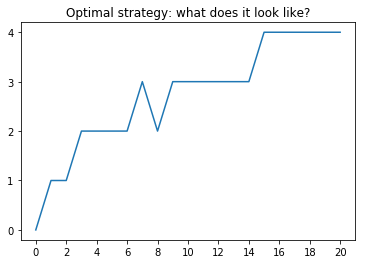

In [41]:
es_for_smaller_ns = [0]
optimal_poisoned = [0]
for k in range(20):
    es_for_smaller_ns.append(ChooseKilled(es_for_smaller_ns)[0])
    optimal_poisoned.append(ChooseKilled(es_for_smaller_ns)[1])
    
pd.DataFrame(optimal_poisoned).plot(title = "Optimal strategy: what does it look like?",
        legend = None, yticks = range(5), xticks = range(0, 21, 2))

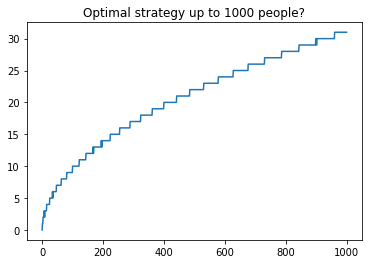

In [42]:
es_for_smaller_ns = [0]
optimal_poisoned = [0]
for k in range(1000):
    es_for_smaller_ns.append(ChooseKilled(es_for_smaller_ns)[0])
    optimal_poisoned.append(ChooseKilled(es_for_smaller_ns)[1])
    
pd.DataFrame(optimal_poisoned).plot(title = "Optimal strategy up to 1000 people",
        legend = None)

We can see that the optimal number of poisoned people on the first night tend to the square root of n. 

What about the survivors? It looks like asymptotically, half of the population is expected to survive.

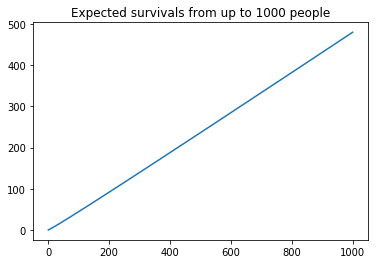

In [44]:
pd.DataFrame(es_for_smaller_ns).plot(title = "Expected survivals from up to 1000 people",
        legend = None)